 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_df = pd.read_csv('/Users/dallasgold/Downloads/whale_returns.csv',index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df.sample(3)

whale_df.sort_index(inplace=True)

whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_df = pd.read_csv('/Users/dallasgold/Downloads/algo_returns.csv',index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df.sample(3)
algo_df.sort_index(inplace=True)

In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [8]:
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp_df = pd.read_csv('/Users/dallasgold/Downloads/sp500_history.csv',index_col='Date', parse_dates=True, infer_datetime_format=True)
sp_df.sort_index(inplace=True)

In [10]:
sp_df.sample(3)

,Close
Date,
2017-07-21,$2472.54
2017-07-17,$2459.14
2018-08-15,$2818.37


In [11]:
# Check Data Types
sp_df.dtypes
# type(sp_df['Date'])

Close    object
dtype: object

In [12]:
# Fix Data Types
# Removing dollar sign 
sp_df['Close'] = sp_df['Close'].str.replace('$','')

# Converting to float
sp_float = sp_df['Close'].astype('float')

# # Confirming data type conversion
print(sp_float.dtypes)

# # Converting data from series to dataframe
sp_flt_df = sp_float.to_frame()
# sp_flt_df = pd.DataFrame(sp_float)

# # Printing sample
sp_flt_df.sample()

float64


,Close
Date,
2014-01-15,1848.38


In [13]:
# Calculate Daily Returns
daily_returns = sp_flt_df.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [20]:
# Drop nulls
daily_returns.dropna(inplace=True)

In [21]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns.columns = ['SP_Pct_Change']
daily_returns.head()

,SP_Pct_Change
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [22]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_df = pd.concat([whale_df, algo_df, daily_returns], axis='columns', join='inner')

In [23]:
joined_df.sort_index(ascending=True, inplace=True)

In [24]:
joined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Pct_Change
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Comparative Daily Returns'}, xlabel='Date'>

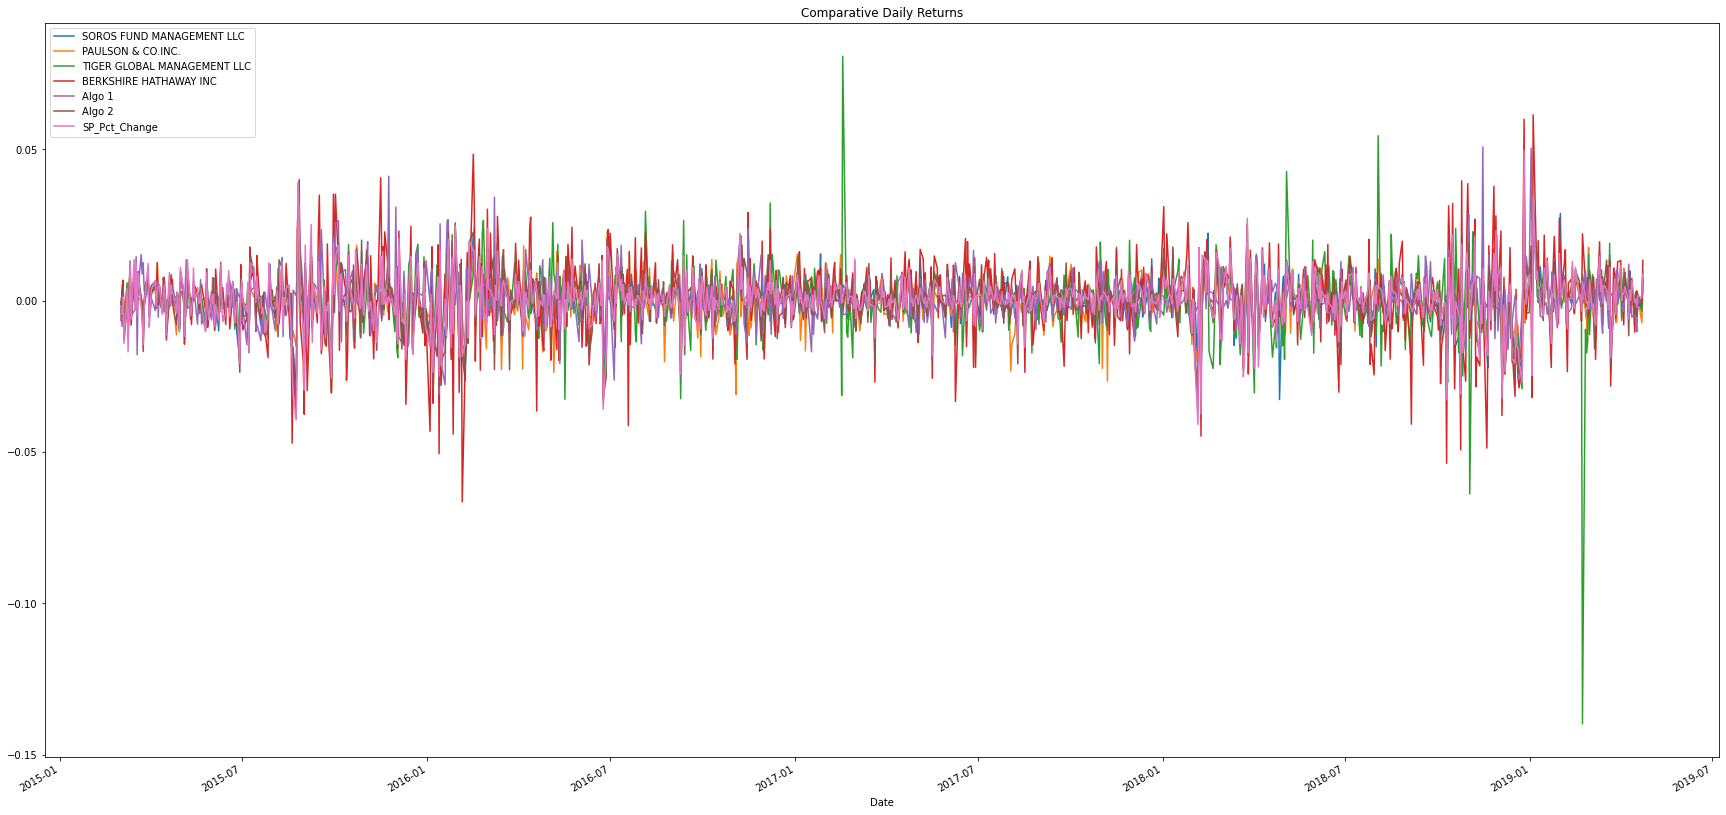

In [25]:
# Plot daily returns of all portfolios
joined_df.plot(title='Comparative Daily Returns', figsize=(30,15))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

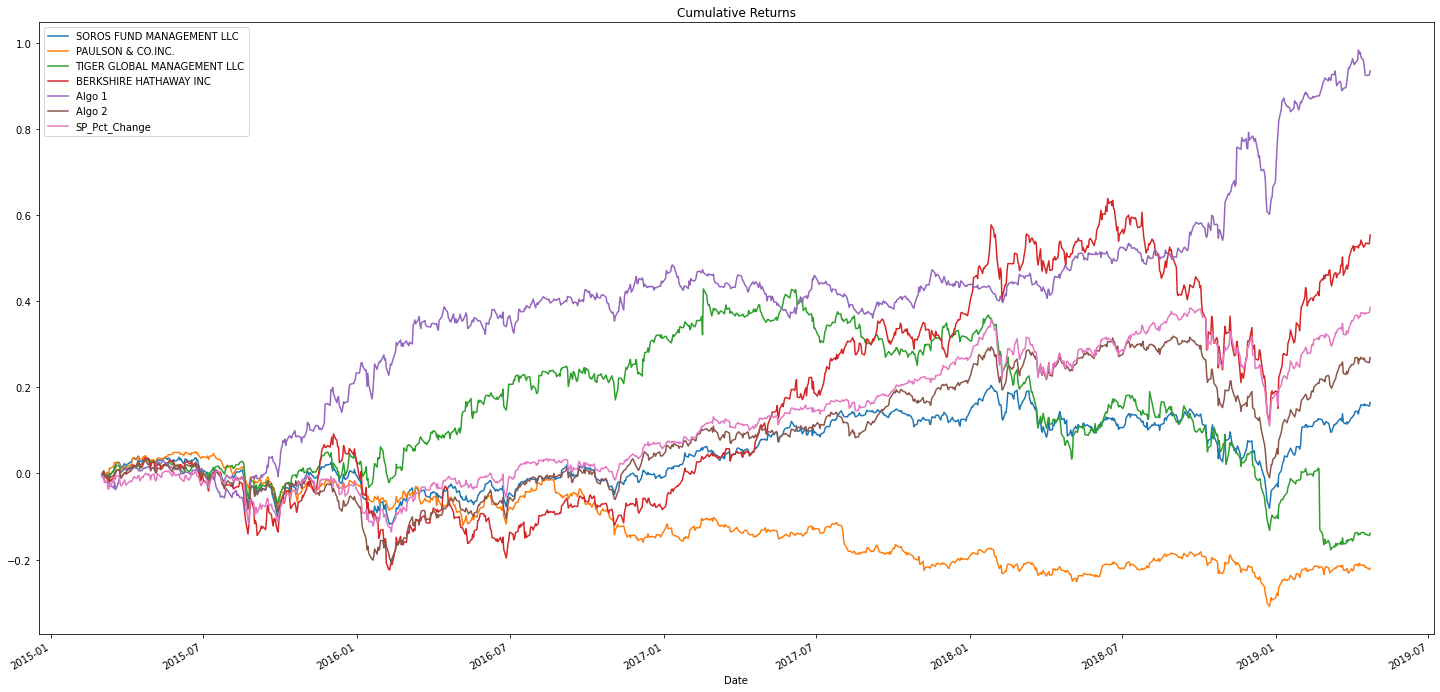

In [26]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns
((joined_df + 1).cumprod() - 1).plot(title='Cumulative Returns', figsize=(25,12.5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

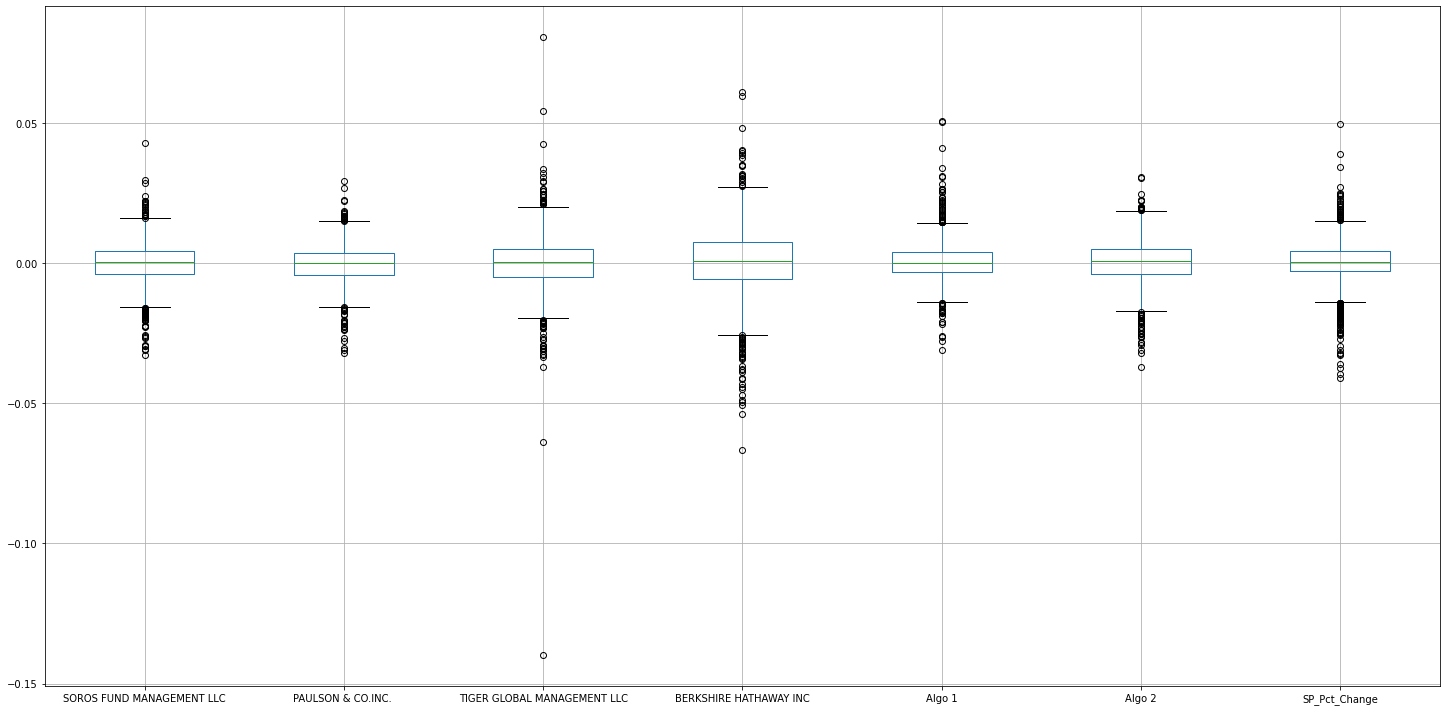

In [27]:
# Box plot to visually show risk
joined_df.boxplot(figsize=(25,12.5))

### Calculate Standard Deviations

In [28]:
# Calculate the daily standard deviations of all portfolios
std_dev_joined = joined_df.std()
std_dev_joined_df = joined_df.std().to_frame()
std_dev_joined_df.columns = ['Std Dev']
std_dev_joined_df

,Std Dev
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
SP_Pct_Change,0.008554


### Determine which portfolios are riskier than the S&P 500

In [30]:
# Calculate the daily standard deviation of S&P 500
sp_sd_df = sp_flt_df.std()
# print(sp_sd_df)

# Determine which portfolios are riskier than the S&P 500

# print(std_dev_joined_df.iloc[6,0])

# Determining which portfolios are riskier than the S&P 500

for index in std_dev_joined_df.index:
    if std_dev_joined_df['Std Dev'][index] > std_dev_joined_df.iloc[6,0]:
        print(f'{index} is more risky than the SP500.')
    elif std_dev_joined_df['Std Dev'][index] < std_dev_joined_df.iloc[6,0]:
        print(f'{index} is less risky than the SP500.')
    else:
        print('')

SOROS FUND MANAGEMENT LLC is less risky than the SP500.
PAULSON & CO.INC.  is less risky than the SP500.
TIGER GLOBAL MANAGEMENT LLC is more risky than the SP500.
BERKSHIRE HATHAWAY INC is more risky than the SP500.
Algo 1 is less risky than the SP500.
Algo 2 is less risky than the SP500.



### Calculate the Annualized Standard Deviation

In [32]:
# Calculate the annualized standard deviation (252 trading days)
vol = joined_df.std() * np.sqrt(252)
vol

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP_Pct_Change                  0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Dev'}, xlabel='Date'>

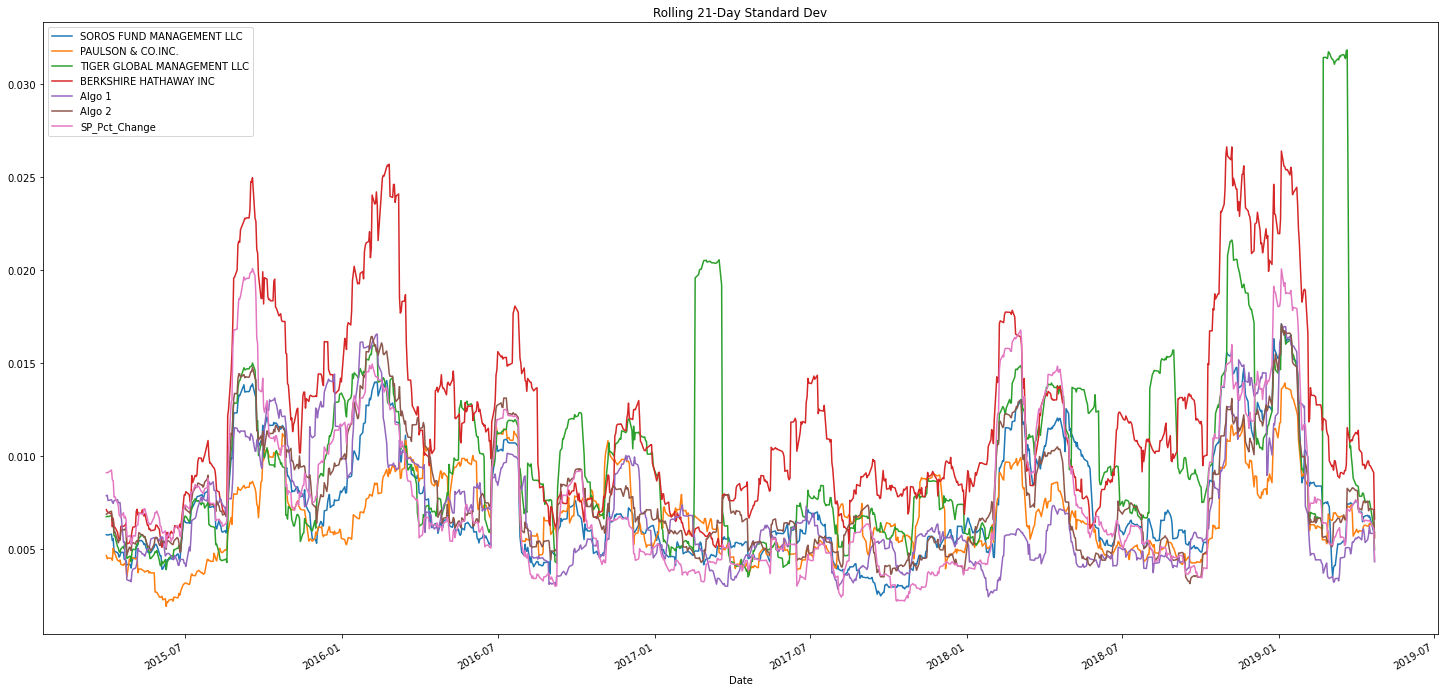

In [33]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_sd = joined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_sd.plot(title='Rolling 21-Day Standard Dev', figsize=(25,12.5))

### Calculate and plot the correlation

In [34]:
# Calculate the correlation
rolling_sd.corr(method='pearson')
# Display de correlation matrix


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Pct_Change
SOROS FUND MANAGEMENT LLC,1.000000,0.664590,0.451969,0.859187,0.721356,0.872922,0.911914
PAULSON & CO.INC.,0.664590,1.000000,0.407927,0.631215,0.585584,0.688595,0.597760
TIGER GLOBAL MANAGEMENT LLC,0.451969,0.407927,1.000000,0.413311,0.265667,0.359691,0.414108
BERKSHIRE HATHAWAY INC,0.859187,0.631215,0.413311,1.000000,0.794022,0.824877,0.812766
Algo 1,0.721356,0.585584,0.265667,0.794022,1.000000,0.760948,0.699671
Algo 2,0.872922,0.688595,0.359691,0.824877,0.760948,1.000000,0.901190
SP_Pct_Change,0.911914,0.597760,0.414108,0.812766,0.699671,0.901190,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'BH Inc vs SP500 90 day Beta'}, xlabel='Date'>

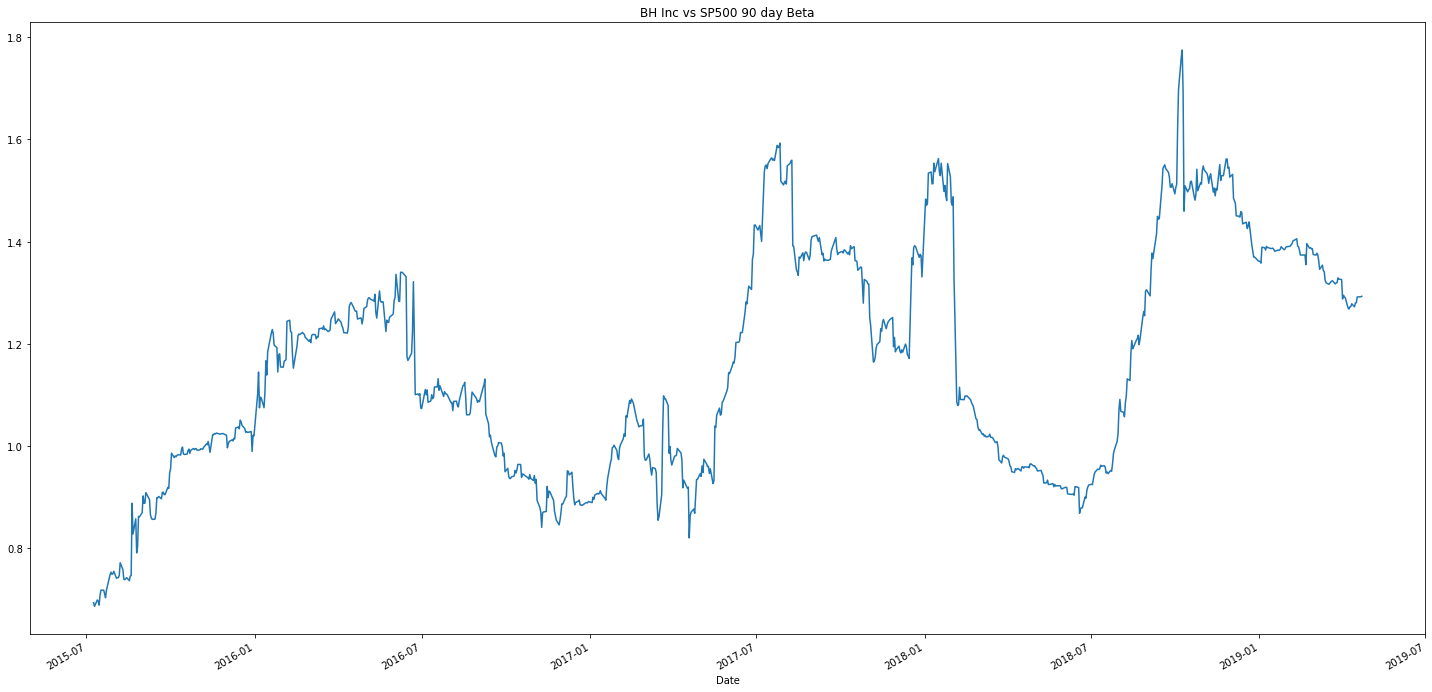

In [35]:
# Calculate covariance of a single portfolio
covari = joined_df['BERKSHIRE HATHAWAY INC'].rolling(window=90).cov(joined_df['SP_Pct_Change'].rolling(window=90))

# Calculate variance of S&P 500
vari = joined_df['SP_Pct_Change'].rolling(window=90).var()

# Computing beta
berk_beta = covari/vari

# Plot beta trend
berk_beta.plot(title='BH Inc vs SP500 90 day Beta', figsize=(25, 12.5))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [36]:
# Use `ewm` to calculate the rolling window
ewm_calc = joined_df.ewm(halflife=21).mean()

# type(ewm_calc)
ewm_calc.sample()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Pct_Change
Date,,,,,,,
2019-03-13,0.001028,0.000456,-0.003341,0.002191,0.001488,0.00127,0.001191


<AxesSubplot:title={'center':'EWM - 21 Day halflife'}, xlabel='Date'>

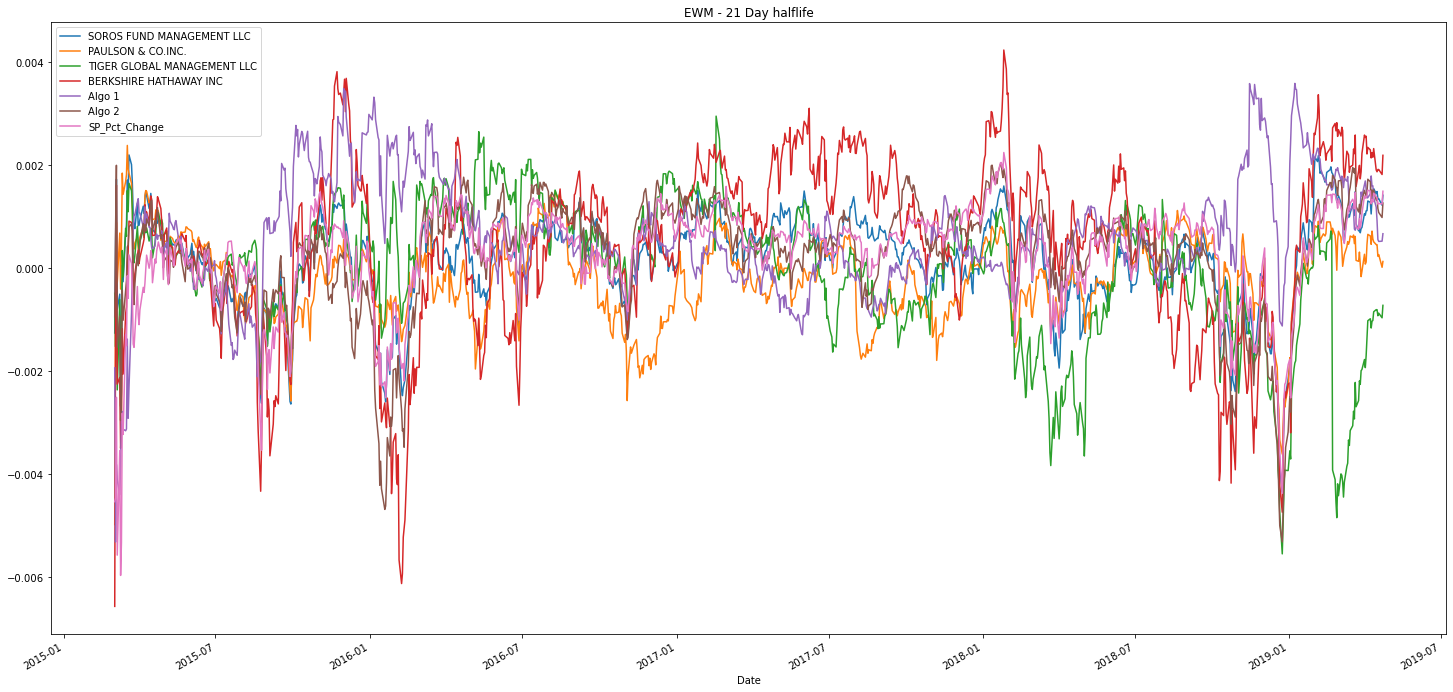

In [37]:
ewm_calc.plot(title='EWM - 21 Day halflife', figsize=(25, 12.5) )

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [38]:
# Annualized Sharpe Ratios
sharpes = (joined_df.mean() * 252)/(joined_df.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Portfolio Sharpe Ratios'}>

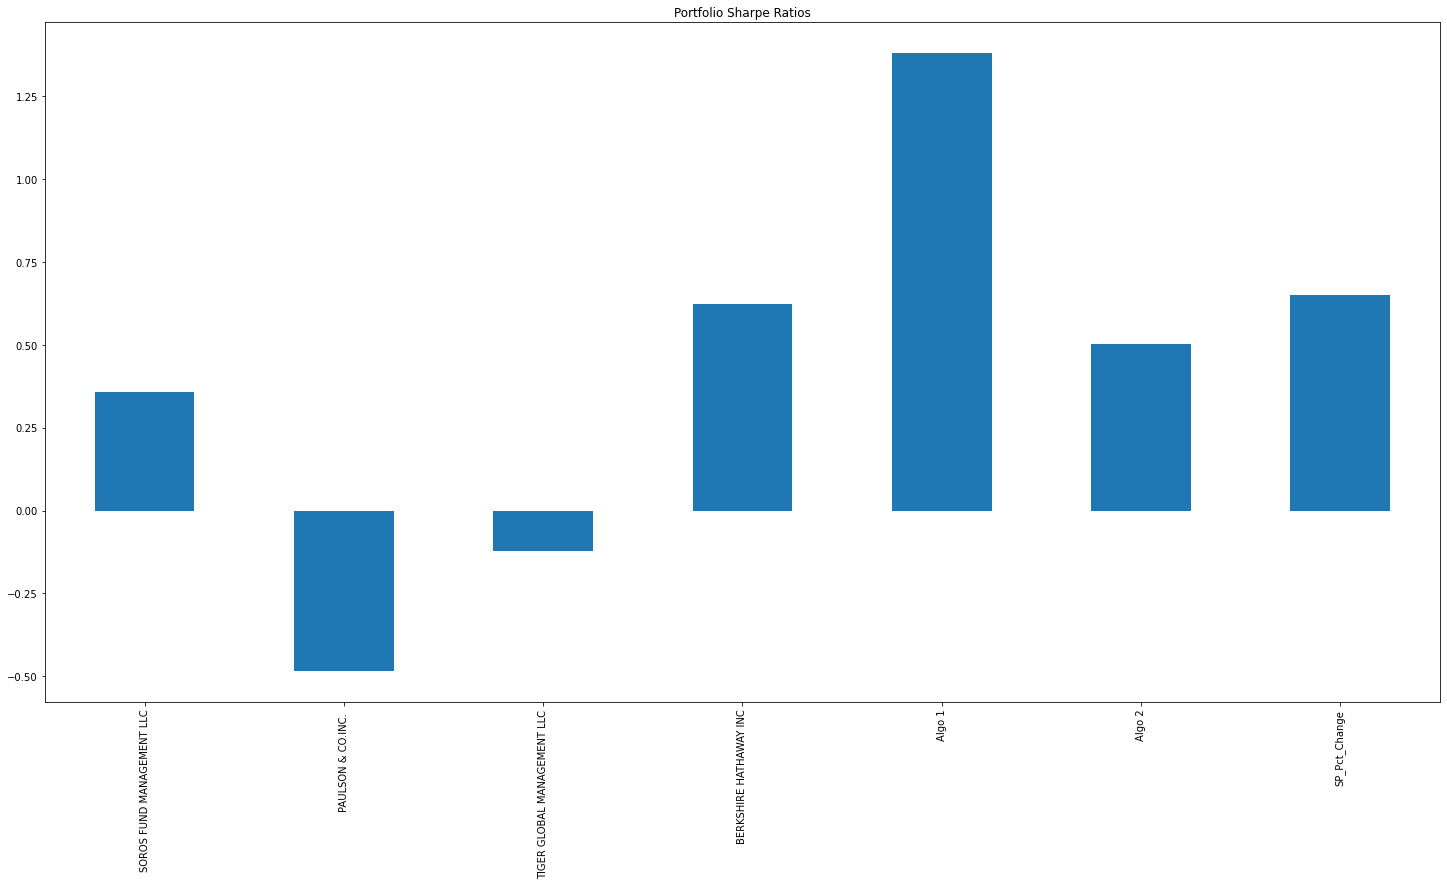

In [39]:
# Visualize the sharpe ratios as a bar plot
sharpes.plot(kind="bar", title="Portfolio Sharpe Ratios",figsize=(25,12.5))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [40]:
# Reading data from 1st stock
apple_csv = Path("/Users/dallasgold/Downloads/apple_data - Sheet1.csv")

apple_df = pd.read_csv(apple_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

# # Sort
apple_df.sort_index(ascending=True, inplace=True)

apple_df.head()

,Close
Date,
2014-05-28,22.29
2014-05-29,22.69
2014-05-30,22.61
2014-06-02,22.45
2014-06-03,22.77


In [41]:
# Reading data from 2nd stock
goog_csv = Path("/Users/dallasgold/Downloads/goog_data - Sheet1.csv")

goog_df = pd.read_csv(goog_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

# # Sort
goog_df.sort_index(ascending=True, inplace=True)

goog_df.head()

,Close
Date,
2014-05-28,560.14
2014-05-29,558.55
2014-05-30,558.36
2014-06-02,552.41
2014-06-03,543.45


In [42]:
# Reading data from 3rd stock
cost_csv = Path("/Users/dallasgold/Downloads/COST_data - Sheet1.csv")

cost_df = pd.read_csv(cost_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

# # Sort
cost_df.sort_index(ascending=True, inplace=True)

cost_df.head()

,Close
Date,
2014-05-28,114.24
2014-05-29,114.14
2014-05-30,116.02
2014-06-02,115.68
2014-06-03,115.51


In [43]:
# Combine all stocks in a single DataFrame
new_stocks = pd.concat([apple_df,goog_df,cost_df], axis='columns', join='inner')

In [44]:
#  rename cols
new_stocks.columns = ['Apple', 'Google', 'Costco']
new_stocks

,Apple,Google,Costco
Date,,,
2014-05-28,22.29,560.14,114.24
2014-05-29,22.69,558.55,114.14
2014-05-30,22.61,558.36,116.02
2014-06-02,22.45,552.41,115.68
2014-06-03,22.77,543.45,115.51
...,...,...,...
2019-04-24,51.79,1256.00,247.96
2019-04-25,51.32,1263.45,245.60
2019-04-26,51.08,1272.18,243.82


In [45]:
# Reset Date index
new_stocks.reset_index()

,Date,Apple,Google,Costco
0,2014-05-28,22.29,560.14,114.24
1,2014-05-29,22.69,558.55,114.14
2,2014-05-30,22.61,558.36,116.02
3,2014-06-02,22.45,552.41,115.68
4,2014-06-03,22.77,543.45,115.51
...,...,...,...,...
1235,2019-04-24,51.79,1256.00,247.96
1236,2019-04-25,51.32,1263.45,245.60
1237,2019-04-26,51.08,1272.18,243.82
1238,2019-04-29,51.15,1287.58,244.28


In [47]:
# Reorganize portfolio data by having a column per symbol
# Isn't this already the case

In [48]:
# Calculate daily returns
new_stocks_pct_chg = new_stocks.pct_change()
# Drop NAs
new_stocks_pct_chg.dropna(inplace=True)
# Display sample data
new_stocks_pct_chg.head()

,Apple,Google,Costco
Date,,,
2014-05-29,0.017945,-0.002839,-0.000875
2014-05-30,-0.003526,-0.000340,0.016471
2014-06-02,-0.007077,-0.010656,-0.002931
2014-06-03,0.014254,-0.016220,-0.001470
2014-06-04,0.011419,-0.000515,0.006926


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [49]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_new_stock_returns = new_stocks_pct_chg.dot(weights)
weighted_new_stock_returns.columns = ['Weighted']
print(weighted_new_stock_returns.columns)
print(weighted_new_stock_returns.head())
# Display sample data


['Weighted']
Date
2014-05-29    0.004744
2014-05-30    0.004202
2014-06-02   -0.006888
2014-06-03   -0.001145
2014-06-04    0.005943
dtype: float64


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [50]:
# Join your returns DataFrame to the original returns DataFrame
new_join_df = pd.concat([joined_df,weighted_new_stock_returns], axis="columns", join="inner")
new_join_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Pct_Change,0
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,0.000778
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.002671
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.004596
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.007494
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.004699


In [51]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_join_df.dropna(inplace=True)
new_join_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Pct_Change,0
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,0.000778
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.002671
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.004596
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.007494
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.004699


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [52]:
# Calculate the annualized `std`
re_run = new_join_df.std()
print(re_run)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP_Pct_Change                  0.008554
0                              0.011237
dtype: float64


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation with 21 day window'}, xlabel='Date'>

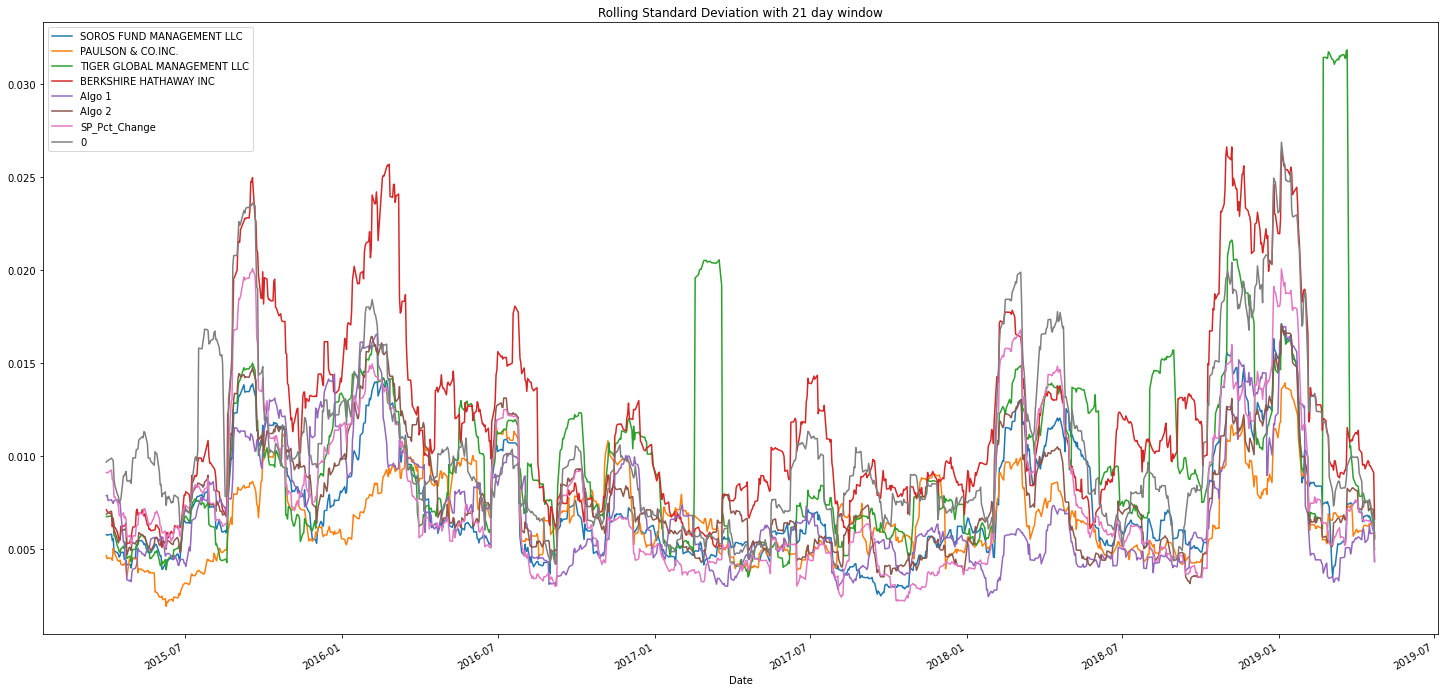

In [57]:
# Calculate rolling standard deviation
new_join_df.rolling(window=21).std().plot(title="Rolling Standard Deviation with 21 day window",figsize=(25,12.5))
# Plot rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:title={'center':'Portfolio Correlation'}>

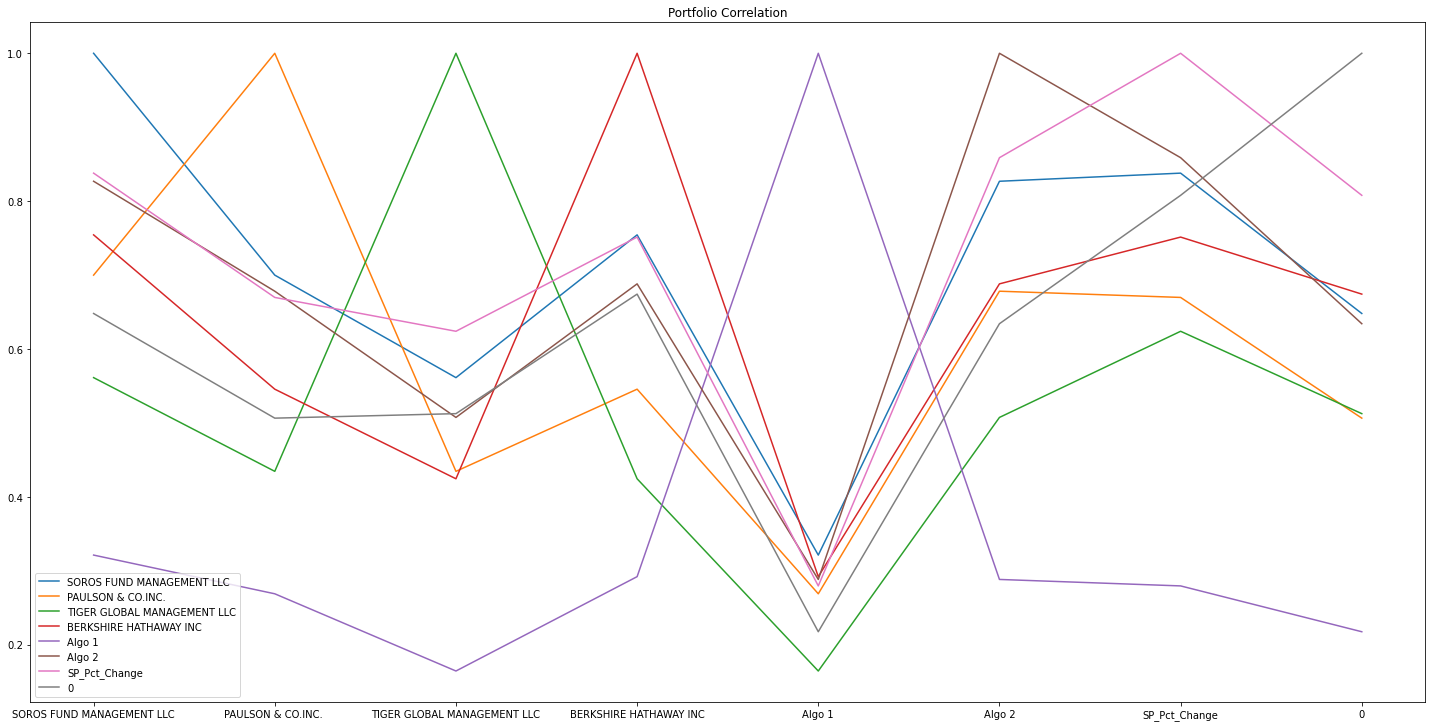

In [58]:
# Calculate and plot the correlation
new_join_df.corr().plot(title="Portfolio Correlation",figsize=(25,12.5))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

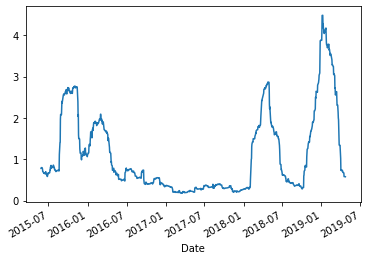

In [66]:
# Calculate and plot Beta
(new_join_df[0].rolling(window=60).cov(new_join_df['SP_Pct_Change'])/new_join_df['SP_Pct_Change'].var()).plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP_Pct_Change                  0.648267
dtype: float64

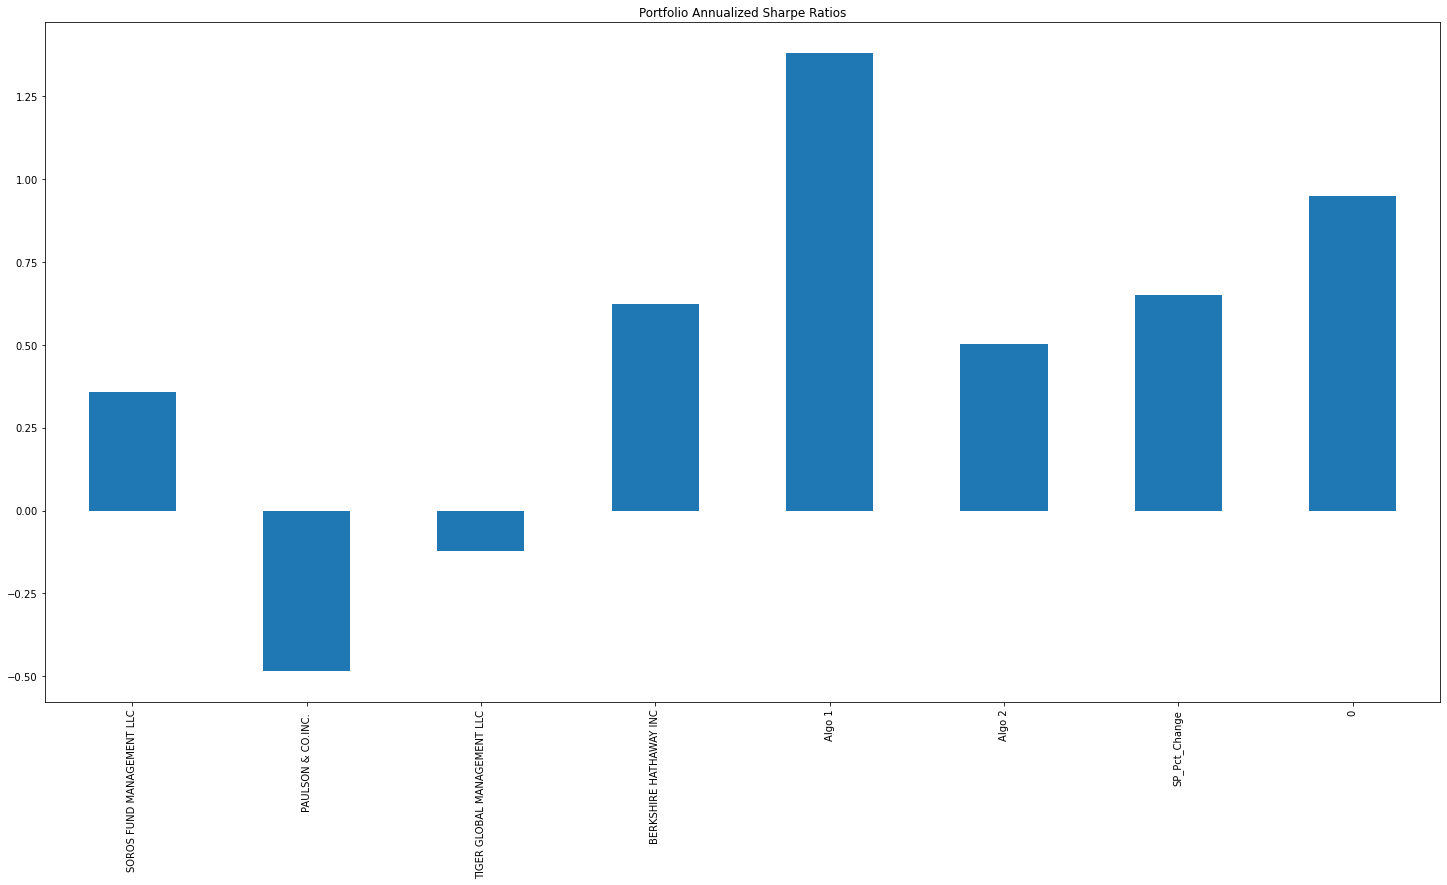

In [69]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratio = ((new_join_df.mean() * 252) / (new_join_df.std() * np.sqrt(252))).plot(kind="bar", title="Portfolio Annualized Sharpe Ratios",figsize=(25,12.5))
sharpes

In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!

Sharpe Ratios above 1 are considered good. So we did ok... being close to one. Decent return to volatility ratio. 